<a href="https://colab.research.google.com/github/DivjotBanga/DivjotBanga.github.io/blob/master/Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# All the imports

In [0]:
from google.colab import files, drive
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Reading The data

In [0]:
drive.mount('./data')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at ./data


In [0]:
recom = pd.read_csv('./data/My Drive/ML_training/ratings_Electronics.csv',header=None,names=["UserID", "ProdID", "Rating", "Timestamp"])

# Data Evaluation

In [0]:
recom.head()

,UserID,ProdID,Rating,Timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [0]:
recom.describe()

,Rating,Timestamp
count,7.824482e+06,7.824482e+06
mean,4.012337e+00,1.338178e+09
std,1.380910e+00,6.900426e+07
min,1.000000e+00,9.127296e+08
25%,3.000000e+00,1.315354e+09
50%,5.000000e+00,1.361059e+09
75%,5.000000e+00,1.386115e+09
max,5.000000e+00,1.406074e+09


# Cleaning The data

Removing the users who have not rated more than 30 Products

In [0]:
filtered_recom = recom[recom.groupby("UserID")["UserID"].transform('size') > 30]

In [0]:
filtered_recom

,UserID,ProdID,Rating,Timestamp
94,A3BY5KCNQZXV5U,0594451647,5.0,1390176000
118,AT09WGFUM934H,0594481813,3.0,1377907200
177,A32HSNCNPRUMTR,0970407998,1.0,1319673600
178,A17HMM1M7T9PJ1,0970407998,4.0,1281744000
200,A3BMUBUC1N77U8,0972683275,4.0,1385164800
389,A6J8D9V5S9MBE,0972683275,5.0,1306886400
406,A39Z4OU2C7ENWH,0972683275,3.0,1328572800
492,A3CLWR1UUZT6TG,0972683275,5.0,1373587200
583,A11NR4AJK9TNQM,0972683275,4.0,1311552000
631,A3TAS1AG6FMBQW,0972683275,5.0,1353456000


Average Rating of a product 

In [0]:
ratings = pd.DataFrame(filtered_recom.groupby('ProdID')['Rating'].mean())
ratings.head()

,Rating
ProdID,
0594451647,5.000000
0594481813,3.000000
0970407998,2.500000
0972683275,4.583333
1400501466,3.571429


In [0]:
ratings['number_of_ratings'] = filtered_recom.groupby('ProdID')['Rating'].count()

In [0]:
ratings.head()

,Rating,number_of_ratings
ProdID,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.583333,12
1400501466,3.571429,7


In [0]:
ratings.count()

Rating               78455
number_of_ratings    78455
dtype: int64

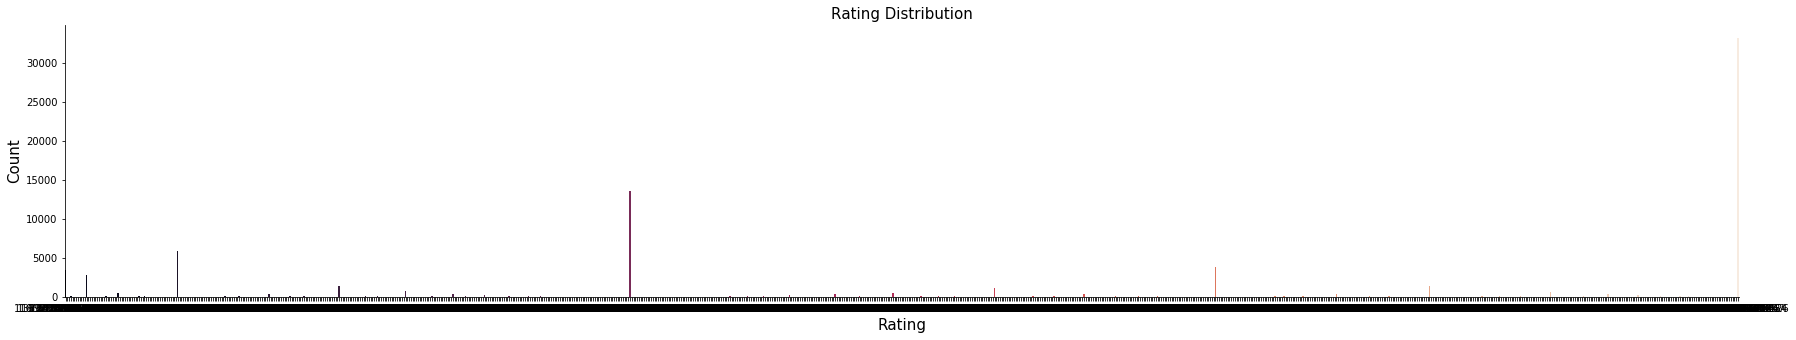

In [0]:
fig, ax = plt.subplots()
fig.set_size_inches(30, 5)
sns.countplot(x = 'Rating',  palette="rocket", data = ratings)
ax.set_xlabel('Rating', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Rating Distribution', fontsize=15)
sns.despine()

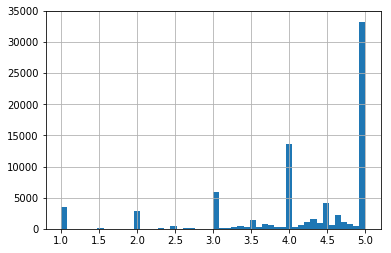

In [0]:
ratings['Rating'].hist(bins=50)

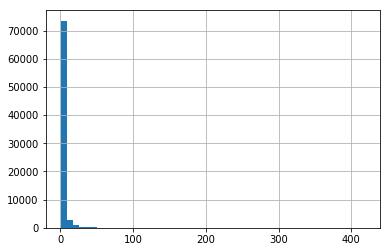

In [0]:
ratings['number_of_ratings'].hist(bins=50)

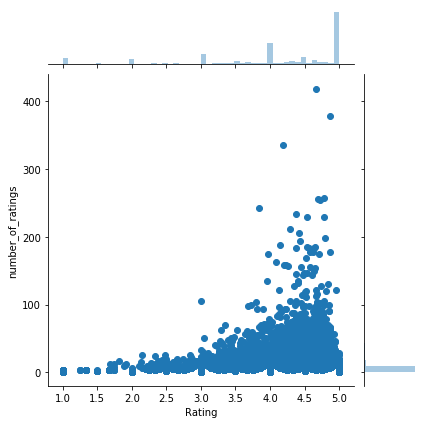

In [0]:
sns.jointplot(x='Rating', y='number_of_ratings', data=ratings)

Removing the product which has not been rated more than 75 times

In [0]:
filtered_recom = filtered_recom[filtered_recom.groupby("ProdID")["ProdID"].transform('size') > 75]

In [0]:
ratings['number_of_ratings'] = filtered_recom.groupby('ProdID')['Rating'].count()

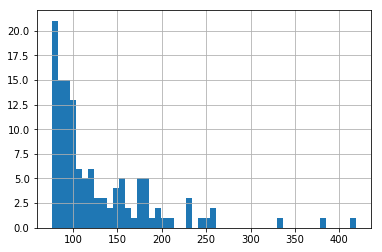

In [0]:
ratings['number_of_ratings'].hist(bins=50)

In [0]:
filtered_recom.head()

,UserID,ProdID,Rating,Timestamp
72039,A3HIZRE3I7X6UV,B00004ZCJE,3.0,1387843200
72043,A2YRX8J4WM5BRX,B00004ZCJE,5.0,1353715200
72059,AU627A4UGIW6V,B00004ZCJE,5.0,1369180800
72074,A3F73SC1LY51OO,B00004ZCJE,3.0,1313366400
72077,A16RL0RMRF974O,B00004ZCJE,5.0,1357776000


Creating the prod_matrix

In [0]:
prod_matrix = filtered_recom.pivot_table(index='UserID', columns='ProdID', values='Rating')
prod_matrix.head(10)

ProdID,B00004ZCJE,B00005T3G0,B000067RT6,B00007E7JU,B00009XVCZ,B0000BZL1P,B00017LSPI,B0002L5R78,B000BQ7GW8,B000CRFOMK,B000FBK3QK,B000HPV3RW,B000JE7GPY,B000JMJWV2,B000LRMS66,B000MX48VM,B000N99BBC,B000Q8UAWY,B000QUUFRW,B000S5Q9CA,B000VX6XL6,B00109Y2DQ,B0012S4APK,B0015DYMVO,B0019EHU8G,B001CHHVCU,B001E1Y5O6,B001NJ0D0Y,B001TH7GSW,B001TH7GUU,B001TH7T2U,B001TOD7ME,B001XURP7W,B0026ZPFCK,B002HWRJBM,B002MAPRYU,B002QEBMAK,B002R5AM7C,B002SQK2F2,B002SZEOLG,...,B006QB1RPY,B006W8U2MU,B0074BW614,B0079UAT0A,B007I5JT4S,B007WTAJTO,B00829THEG,B00829THK0,B00829THVO,B00829TIA4,B00829TIEK,B0082E9K7U,B00834SJNA,B00834SJSK,B00884WH74,B0088CJT4U,B0088PUEPK,B008DWCRQW,B008EQZ25K,B008H9BXMK,B0097BEFYA,B0097CXWUW,B0097CZHAU,B009NHWVIA,B009OZUPUC,B009SYZ8OC,B00AQRUW4Q,B00ARB5FLQ,B00B46XUQU,B00B588HY2,B00BGGDVOO,B00BOHNYTW,B00BOHNYU6,B00BQ4F9ZA,B00CD8ADKO,B00DR0PDNE,B00DVFLJDS,B00E055H5O,B00E3W15P0,B00HFRWWAM
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A107CTGSINY3GJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A107K10JTO8NSH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A108EEYSHGDL6O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10B6G6W3DW1EY,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Dropping all NA values from prod_matrix

In [0]:
prod_matrix.dropna()
prod_matrix.head(10)

ProdID,B00004ZCJE,B00005T3G0,B000067RT6,B00007E7JU,B00009XVCZ,B0000BZL1P,B00017LSPI,B0002L5R78,B000BQ7GW8,B000CRFOMK,B000FBK3QK,B000HPV3RW,B000JE7GPY,B000JMJWV2,B000LRMS66,B000MX48VM,B000N99BBC,B000Q8UAWY,B000QUUFRW,B000S5Q9CA,B000VX6XL6,B00109Y2DQ,B0012S4APK,B0015DYMVO,B0019EHU8G,B001CHHVCU,B001E1Y5O6,B001NJ0D0Y,B001TH7GSW,B001TH7GUU,B001TH7T2U,B001TOD7ME,B001XURP7W,B0026ZPFCK,B002HWRJBM,B002MAPRYU,B002QEBMAK,B002R5AM7C,B002SQK2F2,B002SZEOLG,...,B006QB1RPY,B006W8U2MU,B0074BW614,B0079UAT0A,B007I5JT4S,B007WTAJTO,B00829THEG,B00829THK0,B00829THVO,B00829TIA4,B00829TIEK,B0082E9K7U,B00834SJNA,B00834SJSK,B00884WH74,B0088CJT4U,B0088PUEPK,B008DWCRQW,B008EQZ25K,B008H9BXMK,B0097BEFYA,B0097CXWUW,B0097CZHAU,B009NHWVIA,B009OZUPUC,B009SYZ8OC,B00AQRUW4Q,B00ARB5FLQ,B00B46XUQU,B00B588HY2,B00BGGDVOO,B00BOHNYTW,B00BOHNYU6,B00BQ4F9ZA,B00CD8ADKO,B00DR0PDNE,B00DVFLJDS,B00E055H5O,B00E3W15P0,B00HFRWWAM
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A100WO06OQR8BQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105S56ODHGJEK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A105TOJ6LTVMBG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A107CTGSINY3GJ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A107K10JTO8NSH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A108EEYSHGDL6O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10AFVU66A79Y1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10B6G6W3DW1EY,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Replacing all NA values with zero

In [0]:
prod_matrix.fillna(0)

ProdID,B00004ZCJE,B00005T3G0,B000067RT6,B00007E7JU,B00009XVCZ,B0000BZL1P,B00017LSPI,B0002L5R78,B000BQ7GW8,B000CRFOMK,B000FBK3QK,B000HPV3RW,B000JE7GPY,B000JMJWV2,B000LRMS66,B000MX48VM,B000N99BBC,B000Q8UAWY,B000QUUFRW,B000S5Q9CA,B000VX6XL6,B00109Y2DQ,B0012S4APK,B0015DYMVO,B0019EHU8G,B001CHHVCU,B001E1Y5O6,B001NJ0D0Y,B001TH7GSW,B001TH7GUU,B001TH7T2U,B001TOD7ME,B001XURP7W,B0026ZPFCK,B002HWRJBM,B002MAPRYU,B002QEBMAK,B002R5AM7C,B002SQK2F2,B002SZEOLG,...,B006QB1RPY,B006W8U2MU,B0074BW614,B0079UAT0A,B007I5JT4S,B007WTAJTO,B00829THEG,B00829THK0,B00829THVO,B00829TIA4,B00829TIEK,B0082E9K7U,B00834SJNA,B00834SJSK,B00884WH74,B0088CJT4U,B0088PUEPK,B008DWCRQW,B008EQZ25K,B008H9BXMK,B0097BEFYA,B0097CXWUW,B0097CZHAU,B009NHWVIA,B009OZUPUC,B009SYZ8OC,B00AQRUW4Q,B00ARB5FLQ,B00B46XUQU,B00B588HY2,B00BGGDVOO,B00BOHNYTW,B00BOHNYU6,B00BQ4F9ZA,B00CD8ADKO,B00DR0PDNE,B00DVFLJDS,B00E055H5O,B00E3W15P0,B00HFRWWAM
UserID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A100UD67AHFODS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A100WO06OQR8BQ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105S56ODHGJEK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A105TOJ6LTVMBG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A107CTGSINY3GJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A107K10JTO8NSH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A108EEYSHGDL6O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10AFVU66A79Y1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10B6G6W3DW1EY,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

SOrting the prod based on nnumber of ratings

In [0]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,Rating,number_of_ratings
ProdID,,
B007WTAJTO,4.668258,419.0
B003ES5ZUU,4.868074,379.0
B0088CJT4U,4.182090,335.0
B000N99BBC,4.782101,257.0
B002WE6D44,4.695312,256.0
B002V88HFE,4.724409,254.0
B00DR0PDNE,3.839506,243.0
B00829TIEK,4.369099,233.0
B0019EHU8G,4.777293,229.0


# Finding the correlation

Finding the correlation between product with ID B007WTAJTO and B003ES5ZUU

In [0]:
AFO_user_rating = prod_matrix['B007WTAJTO']
contact_user_rating = prod_matrix['B003ES5ZUU']

In [0]:
contact_user_rating.head(20)

UserID
A100UD67AHFODS    NaN
A100WO06OQR8BQ    5.0
A105S56ODHGJEK    NaN
A105TOJ6LTVMBG    NaN
A107CTGSINY3GJ    NaN
A107K10JTO8NSH    NaN
A108EEYSHGDL6O    NaN
A10AFVU66A79Y1    NaN
A10B6G6W3DW1EY    NaN
A10C5CJK1YKGV0    NaN
A10C84Y38RT22P    NaN
A10CRW7XRJBJ2G    NaN
A10DFH2Y5LWEU0    NaN
A10G4BPT5MGBHY    NaN
A10H24TDLK2VDP    NaN
A10JPZAYDGFHEV    5.0
A10LWFKVC21F82    NaN
A10M0GF5ZFODYU    NaN
A10NMELR4KX0J6    NaN
A10NQKIG7NXUR7    5.0
Name: B003ES5ZUU, dtype: float64

In [0]:
AFO_user_rating.head(20)

UserID
A100UD67AHFODS    NaN
A100WO06OQR8BQ    NaN
A105S56ODHGJEK    NaN
A105TOJ6LTVMBG    NaN
A107CTGSINY3GJ    5.0
A107K10JTO8NSH    NaN
A108EEYSHGDL6O    NaN
A10AFVU66A79Y1    NaN
A10B6G6W3DW1EY    4.0
A10C5CJK1YKGV0    NaN
A10C84Y38RT22P    1.0
A10CRW7XRJBJ2G    NaN
A10DFH2Y5LWEU0    NaN
A10G4BPT5MGBHY    NaN
A10H24TDLK2VDP    NaN
A10JPZAYDGFHEV    5.0
A10LWFKVC21F82    NaN
A10M0GF5ZFODYU    NaN
A10NMELR4KX0J6    NaN
A10NQKIG7NXUR7    NaN
Name: B007WTAJTO, dtype: float64

Finding the correlation between the product and rest of the matrix


In [0]:
similar_to_air_force_one=prod_matrix.corrwith(AFO_user_rating)

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [0]:
similar_to_air_force_one.head(20)

ProdID
B00004ZCJE    0.411833
B00005T3G0         NaN
B000067RT6         NaN
B00007E7JU    0.666667
B00009XVCZ         NaN
B0000BZL1P    0.939336
B00017LSPI    0.612372
B0002L5R78    0.447214
B000BQ7GW8    0.570922
B000CRFOMK    0.395285
B000FBK3QK   -0.137679
B000HPV3RW   -0.113228
B000JE7GPY         NaN
B000JMJWV2    0.170757
B000LRMS66    0.683130
B000MX48VM    0.022222
B000N99BBC   -0.071659
B000Q8UAWY    0.763763
B000QUUFRW    0.492716
B000S5Q9CA   -0.121213
dtype: float64

In [0]:
similar_to_air_force_one['B003ES5ZUU']

0.07277020057722954

In [0]:
similar_to_air_force_one.sort_values(ascending=False).head(300)

ProdID
B007WTAJTO    1.000000
B00BOHNYTW    1.000000
B002Y6CJJ8    1.000000
B004SBBD8U    1.000000
B00884WH74    1.000000
B00829THEG    0.944911
B0000BZL1P    0.939336
B004TJ6JH6    0.906648
B00829TIA4    0.882498
B0036Q7MV0    0.866845
B00109Y2DQ    0.791924
B000Q8UAWY    0.763763
B0041Q38NU    0.760186
B002WE4HE2    0.683213
B000LRMS66    0.683130
B0088PUEPK    0.674200
B00007E7JU    0.666667
B00017LSPI    0.612372
B0063705PE    0.612372
B00E055H5O    0.595238
B000BQ7GW8    0.570922
B00HFRWWAM    0.569803
B0052SCU8U    0.551677
B009OZUPUC    0.547723
B002MAPRYU    0.537878
B002R5AM7C    0.525150
B003M0NURK    0.499137
B000QUUFRW    0.492716
B004CLYEDC    0.471405
B00B588HY2    0.470757
                ...   
B004Q3R9AQ   -0.218218
B009NHWVIA   -0.250000
B004CLYE8C   -0.250000
B00B46XUQU   -0.251772
B002SZEOLG   -0.256776
B0043T7FXE   -0.264255
B004W2JKWG   -0.311086
B0079UAT0A   -0.381881
B0097CZHAU   -0.408248
B001CHHVCU   -0.500000
B0097CXWUW   -0.534522
B008DWCRQW   -0.552158
B000

In [0]:
similar_to_contact = prod_matrix.corrwith(contact_user_rating)

In [0]:
similar_to_contact.head(100)

ProdID
B00004ZCJE         NaN
B00005T3G0         NaN
B000067RT6    0.941979
B00007E7JU    0.395285
B00009XVCZ    0.174078
B0000BZL1P    0.755929
B00017LSPI    0.353553
B0002L5R78    0.372104
B000BQ7GW8    0.215686
B000CRFOMK    0.100000
B000FBK3QK         NaN
B000HPV3RW   -0.062500
B000JE7GPY   -0.200595
B000JMJWV2    0.039559
B000LRMS66   -0.059042
B000MX48VM    0.118947
B000N99BBC    0.691564
B000Q8UAWY   -0.140174
B000QUUFRW    0.109618
B000S5Q9CA         NaN
B000VX6XL6   -0.071638
B00109Y2DQ    0.944911
B0012S4APK   -0.247896
B0015DYMVO    0.267818
B0019EHU8G    0.165675
B001CHHVCU   -0.059761
B001E1Y5O6    0.148522
B001NJ0D0Y         NaN
B001TH7GSW    0.153033
B001TH7GUU   -0.047946
                ...   
B004SBBD8U    0.217391
B004T9RR6I    0.028398
B004TJ6JH6    0.577350
B004W2JKWG         NaN
B004XC6GJ0         NaN
B0052SCU8U         NaN
B005CLPP84    0.326673
B005CT56F8    0.221528
B005DKZTMG    0.077475
B005FYNSPK    0.406320
B005HMKKH4    0.322201
B005QCDY50    0.612372
B006

In [0]:
corr_contact = pd.DataFrame(similar_to_contact, columns=['Correlation'])
corr_contact.dropna(inplace=True)
corr_contact.head()

,Correlation
ProdID,
B000067RT6,0.941979
B00007E7JU,0.395285
B00009XVCZ,0.174078
B0000BZL1P,0.755929
B00017LSPI,0.353553


In [0]:
corr_contact.sort_values('Correlation',ascending=False).head(500)

,Correlation
ProdID,
B003ES5ZUU,1.000000
B00109Y2DQ,0.944911
B000067RT6,0.941979
B008EQZ25K,0.805823
B001TH7T2U,0.770492
B0000BZL1P,0.755929
B000N99BBC,0.691564
B00483WRZ6,0.670820
B002V8C3W2,0.670820


In [0]:
corr_AFO = pd.DataFrame(similar_to_air_force_one, columns=['correlation'])
corr_AFO.dropna(inplace=True)
corr_AFO.head()

,correlation
ProdID,
B00004ZCJE,0.411833
B00007E7JU,0.666667
B0000BZL1P,0.939336
B00017LSPI,0.612372
B0002L5R78,0.447214


In [0]:
corr_AFO.sort_values('correlation',ascending=False).head(500)

,correlation
ProdID,
B002Y6CJJ8,1.000000
B007WTAJTO,1.000000
B00BOHNYTW,1.000000
B004SBBD8U,1.000000
B00884WH74,1.000000
B00829THEG,0.944911
B0000BZL1P,0.939336
B004TJ6JH6,0.906648
B00829TIA4,0.882498
